In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import json

In [9]:
data_dir = Path("../data/")
read_dir = data_dir / "read_only_0"
write_dir = data_dir / "write_only_0"
read_write_dir = data_dir / "read_write_0"

dir_lst = [read_dir, write_dir, read_write_dir]

In [10]:
db_params_dict = {}
for dir_ in dir_lst:
    dir_name = dir_.name
    db_params_dict[dir_name] = pd.read_csv(dir_ / "results.csv")
print(list(db_params_dict.keys()))

['read_only_0', 'write_only_0', 'read_write_0']


In [11]:
print(db_params_dict["read_only_0"])

  workload   innodb_buffer_pool_size   innodb_io_capacity  \
0      low                 268435456                  200   
1      low                 268435456                  300   
2      low                 268435456                  400   
3   medium                 268435456                  200   
4   medium                 268435456                  300   
5   medium                 268435456                  400   
6     high                 268435456                  200   
7     high                 268435456                  300   
8     high                 268435456                  400   

                                         transaction  
0       transactions:                        2394...  
1       transactions:                        2340...  
2       transactions:                        2362...  
3       transactions:                        4539...  
4       transactions:                        3339...  
5       transactions:                        3111...  
6   

In [12]:
data_dict = {dir.name: {} for dir in dir_lst}
for dir_ in dir_lst:
    json_paths = dir_.glob("*.json")
    print(dir_.name)
    for path in json_paths:
        with open(path, 'r') as f:
            key = path.name[:-24]
            results = json.load(f)["results"]
            if "query" == key and dir_.name == "read_write_0":
                for cmd_dir in results[0]["data"]:
                    data = cmd_dir["NumericType"]
                    cmd = cmd_dir["tags"]["command"]
                    print(cmd)
                    print(data)

read_only_0
write_only_0
read_write_0
drop_table
['NaN', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
insert
['NaN', 167, 280.6, 210.73333333333332, 221.8, 220.6, 259.06666666666666, 269.3333333333333, 272.6666666666667, 250.66666666666666, 290.3333333333333, 103.73333333333333, 0, 0, 0, 0, 70.73333333333333, 173.13333333333333, 239, 174.93333333333334, 219.8, 161.53333333333333, 141.66666666666666, 161.33333333333334, 189.33333333333334, 280.8666666666667, 73.66666666666667, 0, 0, 0, 0, 126.06666666666666, 273.93333333333334, 265.26666666666665, 252.33333333333334, 237, 267.8666666666

In [13]:
data_dict = {dir.name: {} for dir in dir_lst}
for dir_ in dir_lst:
    json_paths = dir_.glob("*.json")
    for path in json_paths:
        with open(path, 'r') as f:
            key = path.name[:-24]
            results = json.load(f)["results"]
            if "query" == key:
                for cmd_dir in results[0]["data"]:
                    data = cmd_dir["NumericType"]
                    cmd = cmd_dir["tags"]["command"]
                    data_dict[dir_.name][key + f"-{cmd}"] = data
            elif "handler" == key:
                for handler_dir in results[0]["data"]:
                    data = handler_dir["NumericType"]
                    handler = handler_dir["tags"]["handler"]
                    data_dict[dir_.name][key + f"-{handler}"] = data
            elif "avg_innodb_row_updates" == key:
                for ops_dir in results[0]["data"]:
                    data = ops_dir["NumericType"]
                    ops = ops_dir["tags"]["operation"]
                    data_dict[dir_.name][key + f"-{ops}"] = data
            else:
                data = results[0]["data"][0]["NumericType"]
                data_dict[dir_.name][key] = data
print(list(data_dict["read_only_0"].keys()))

['innodbu_io_capacity', 'innodb_buffer_pool', 'threads_connected', 'cpu', 'query-insert', 'query-create_table', 'query-drop_table', 'query-delete', 'query-alter_table', 'query-update', 'query-select', 'query-replace', 'query-drop_index', 'query-commit', 'handler-discover', 'handler-read_prev', 'handler-update', 'handler-read_next', 'handler-read_last', 'handler-external_lock', 'handler-read_rnd', 'handler-savepoint_rollback', 'handler-read_key', 'handler-savepoint', 'handler-delete', 'handler-commit', 'handler-mrr_init', 'handler-write', 'handler-read_first', 'handler-prepare', 'handler-rollback', 'handler-read_rnd_next', 'avg_innodb_row_reads', 'avg_innodb_row_updates-inserted', 'avg_innodb_row_updates-updated', 'avg_innodb_row_updates-deleted', 'innodb_io', 'network_io', 'query_response_time', 'disk_busy', 'disk_used_(gb)', 'avg_mem_used', 'disk_iops', 'avg_lock_wait_time', 'disk_used_(%)']


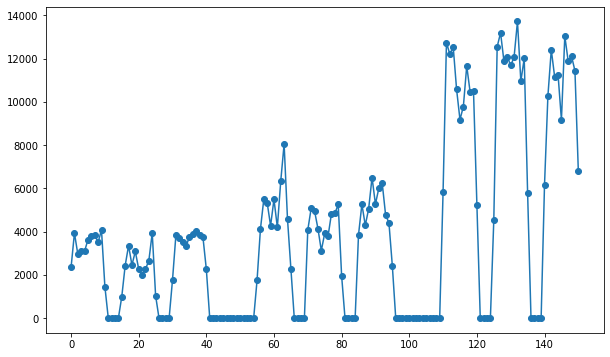

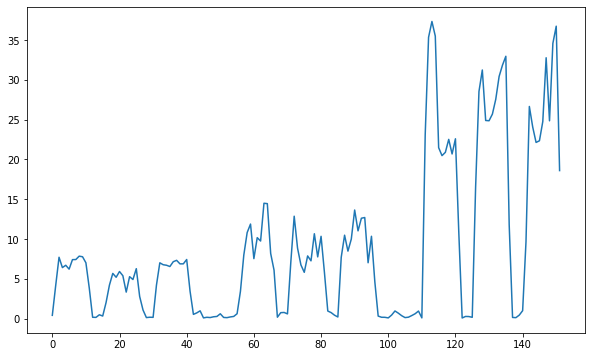

In [14]:
def remove_nan(lst):
    return [elem for elem in lst if elem not in {"NaN", "Nan", "nan"} and elem is not None]

read_only_data = data_dict["read_write_0"]
query_nums = remove_nan(read_only_data["query-select"])
plt.figure(figsize=(10, 6))
plt.plot(range(len(query_nums)), query_nums, '-o')
plt.show()

cpu = read_only_data["cpu"]
plt.figure(figsize=(10, 6))
plt.plot(range(len(cpu)), cpu)
plt.show()

In [15]:
df_dict = {}
for workload, data in data_dict.items():
    df = pd.DataFrame(data, dtype="float32")
    df_dict[workload] = df
    df.dropna(inplace=True)

    # query数が0近くから急激に上昇した直後 or 急激に0近くまで下降した直前のデータを取り除く
    query_nums = df.filter(like="query-").sum(axis=1)
    rm_indices = set(query_nums[query_nums < 10].index.to_list())
    rm_indices = rm_indices | {idx + 1 for idx in rm_indices if idx < len(df)} | {idx - 1 for idx in rm_indices if idx > 0} | {1, len(df)}
    df.drop(rm_indices, inplace=True)

In [203]:
print(df.columns.to_list())

['innodbu_io_capacity', 'innodb_buffer_pool', 'threads_connected', 'cpu', 'query-insert', 'query-create_table', 'query-drop_table', 'query-delete', 'query-alter_table', 'query-update', 'query-select', 'query-replace', 'query-drop_index', 'query-commit', 'handler-discover', 'handler-read_prev', 'handler-update', 'handler-read_next', 'handler-read_last', 'handler-external_lock', 'handler-read_rnd', 'handler-savepoint_rollback', 'handler-read_key', 'handler-savepoint', 'handler-delete', 'handler-commit', 'handler-mrr_init', 'handler-write', 'handler-read_first', 'handler-prepare', 'handler-rollback', 'handler-read_rnd_next', 'avg_innodb_row_reads', 'avg_innodb_row_updates-inserted', 'avg_innodb_row_updates-updated', 'avg_innodb_row_updates-deleted', 'innodb_io', 'network_io', 'query_response_time', 'disk_busy', 'disk_used_(gb)', 'avg_mem_used', 'disk_iops', 'avg_lock_wait_time', 'disk_used_(%)']


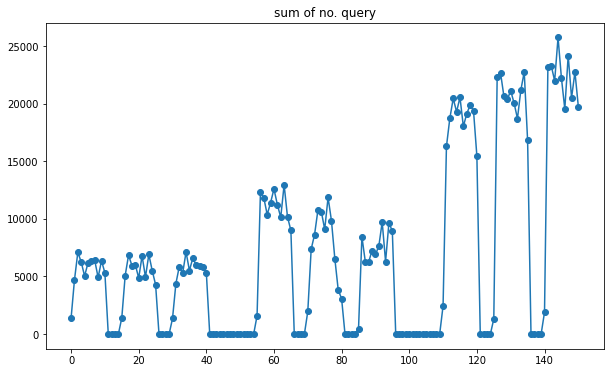

In [232]:
plt.figure(figsize=(10, 6))
df = pd.DataFrame(data_dict["read_only_0"], dtype="float32")
df.dropna(inplace=True)
query_nums = df.filter(like="query-").sum(axis=1)
plt.plot(np.arange(len(query_nums)), query_nums, '-o')
plt.title("sum of no. query")
plt.show()

<Figure size 720x432 with 0 Axes>

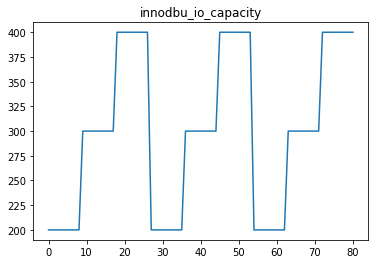

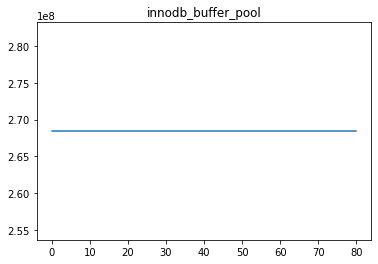

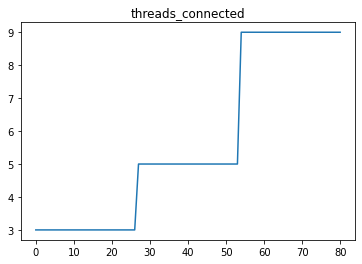

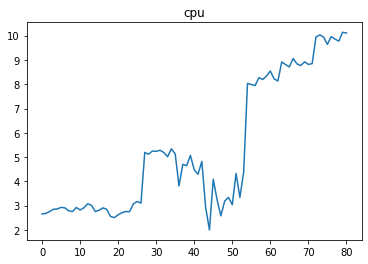

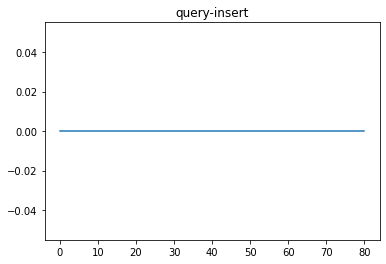

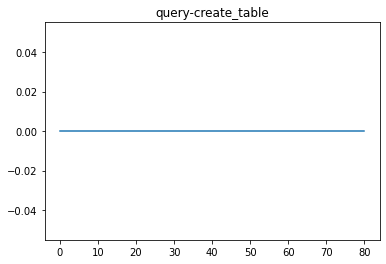

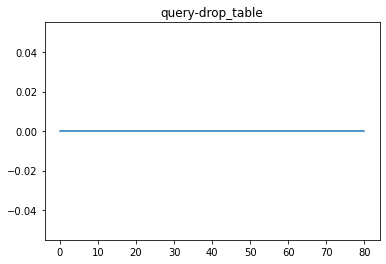

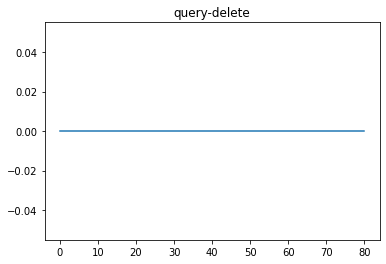

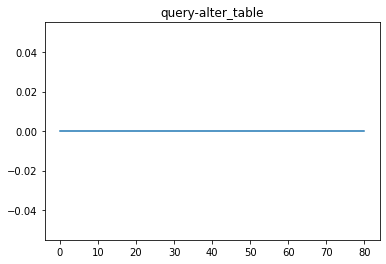

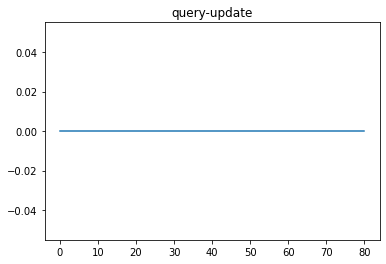

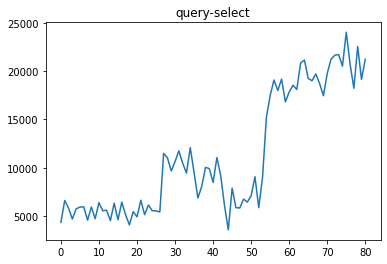

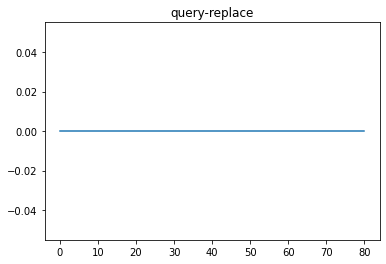

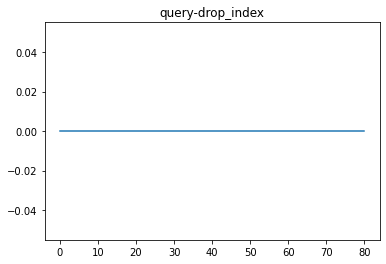

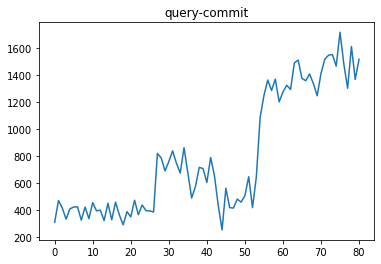

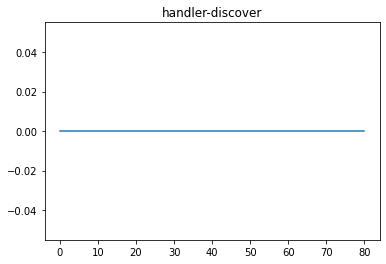

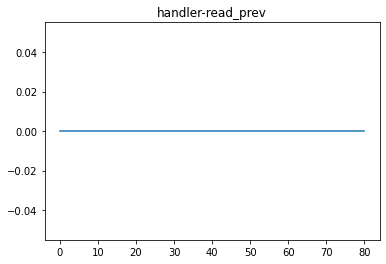

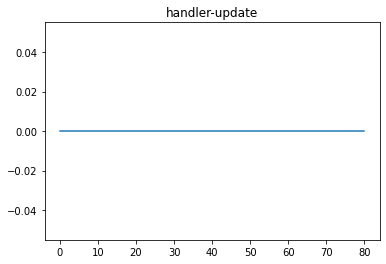

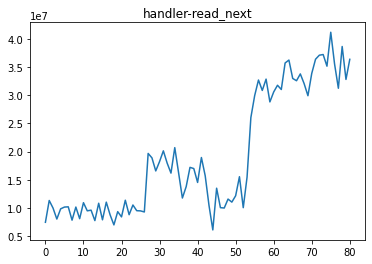

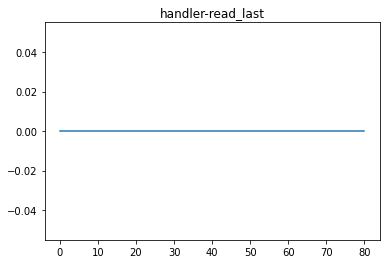

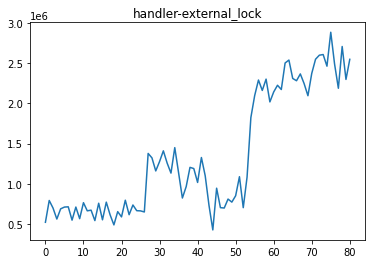

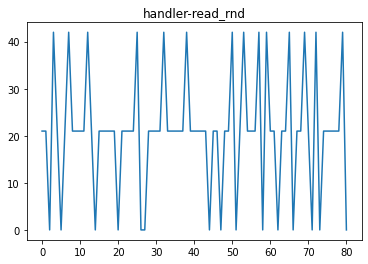

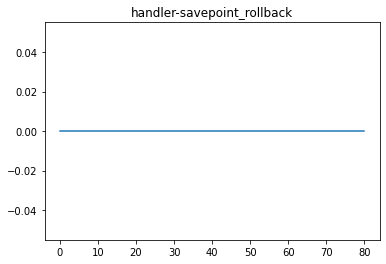

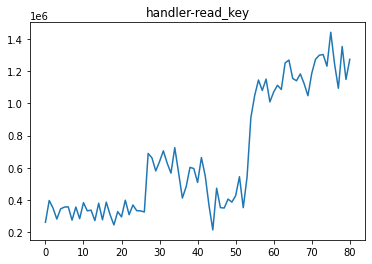

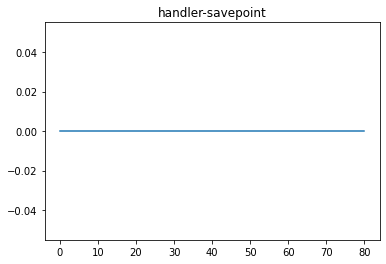

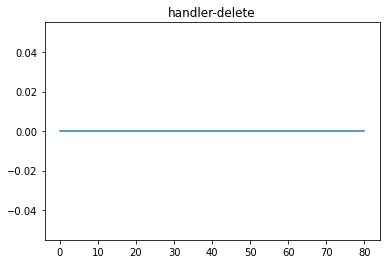

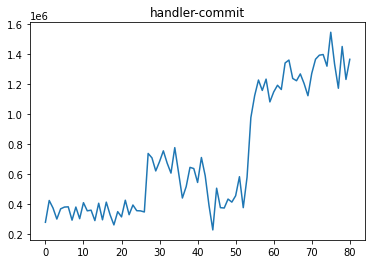

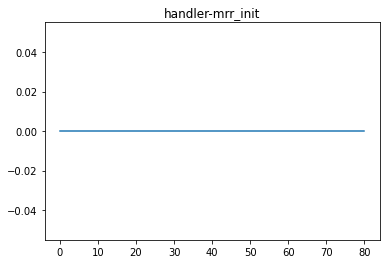

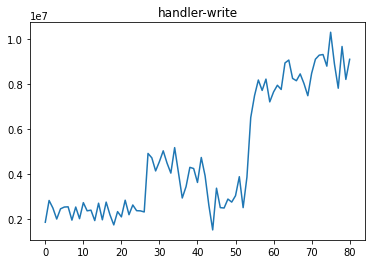

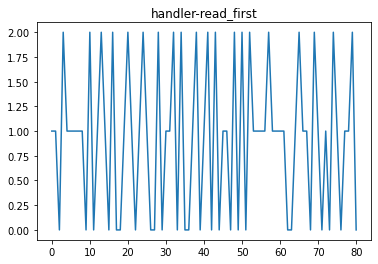

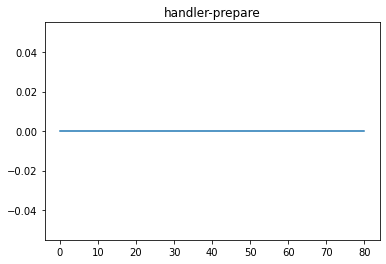

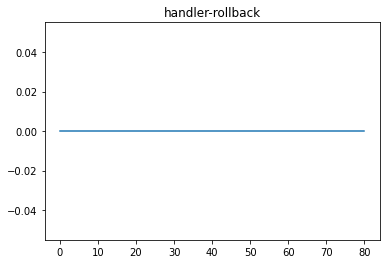

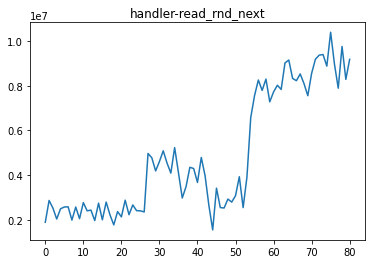

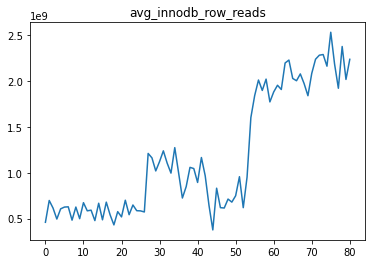

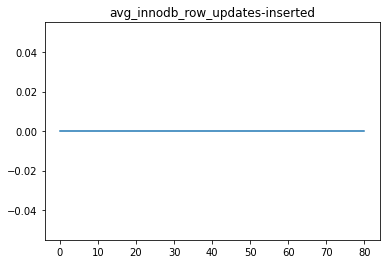

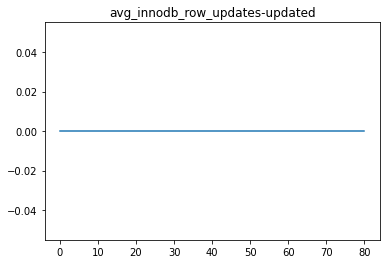

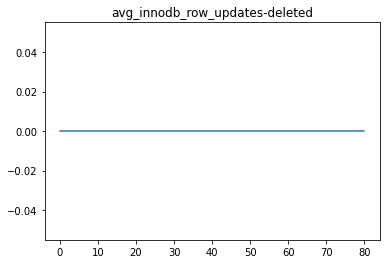

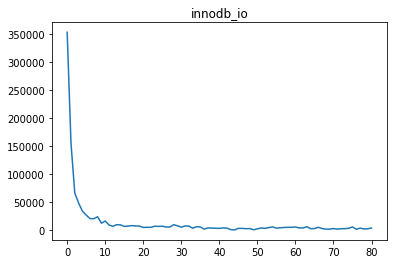

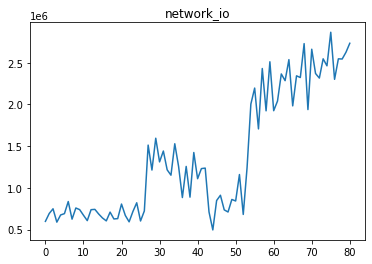

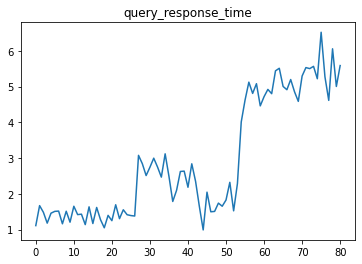

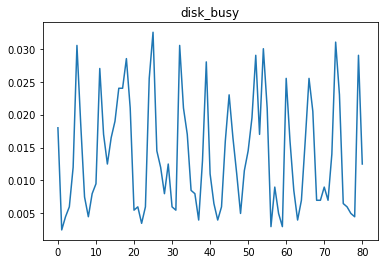

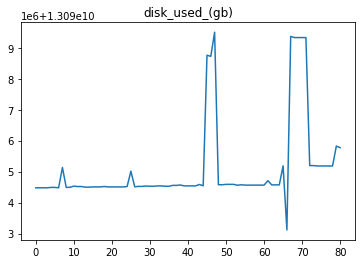

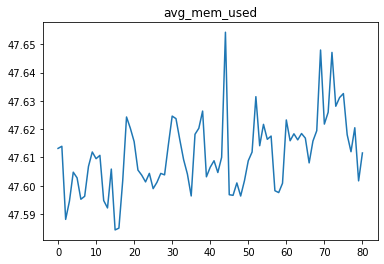

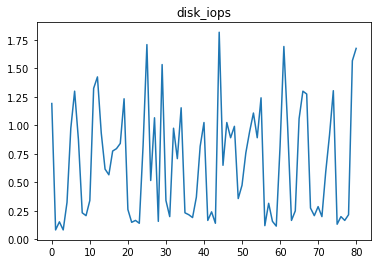

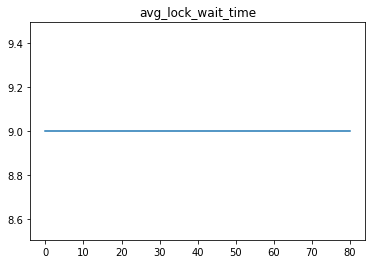

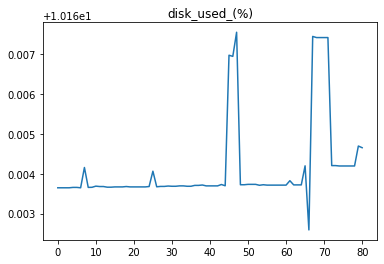

In [234]:
plt.figure(figsize=(10, 6))
df = df_dict["read_only_0"]
plt.show()
for metric in df.columns:
    plt.plot(range(len(df)), df[metric])
    plt.title(metric)
    plt.show()